In [1]:
!pip install hdbscan

  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp38-cp38-win_amd64.whl size=601942 sha256=5ad7877c6299d1eb0588b13768ea93358645bf06f6334ed80ddb1a66dd8d5e4b
  Stored in directory: c:\users\antoz\appdata\local\pip\cache\wheels\dc\71\35\27e492e5848c7d1b38a6ea86e10261fd7ebaabf7e72c0b47c4
Successfully built hdbscan
  Attempting uninstall: joblib
    Found existing installation: joblib 0.17.0
    Uninstalling joblib-0.17.0:
      Successfully uninstalled joblib-0.17.0


You should consider upgrading via the 'c:\users\antoz\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as data
%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}

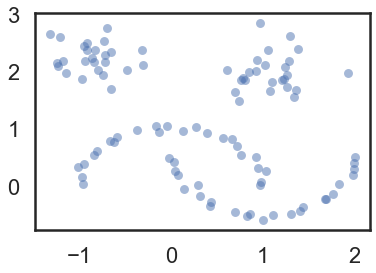

In [3]:
moons, _ = data.make_moons(n_samples=50, noise=0.05)
blobs, _ = data.make_blobs(n_samples=50, centers=[(-0.75,2.25), (1.0, 2.0)], cluster_std=0.25)
test_data = np.vstack([moons, blobs])
plt.scatter(test_data.T[0], test_data.T[1], color='b', **plot_kwds)

In [4]:
import hdbscan
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
clusterer.fit(test_data)


HDBSCAN(gen_min_span_tree=True)

<AxesSubplot:>

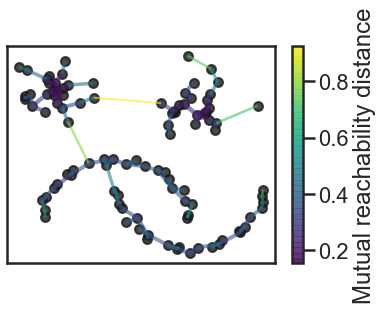

In [5]:
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=80,
                                      edge_linewidth=2)

<AxesSubplot:ylabel='distance'>

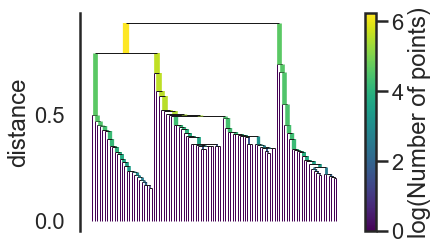

In [6]:
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)


<AxesSubplot:ylabel='$\\lambda$ value'>

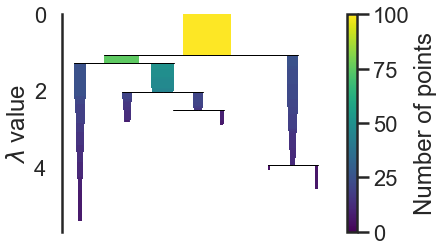

In [7]:
clusterer.condensed_tree_.plot()


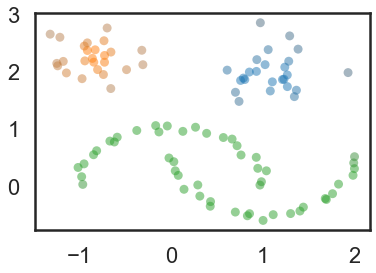

In [8]:
palette = sns.color_palette()
cluster_colors = [sns.desaturate(palette[col], sat)
                  if col >= 0 else (0.5, 0.5, 0.5) for col, sat in
                  zip(clusterer.labels_, clusterer.probabilities_)]
plt.scatter(test_data.T[0], test_data.T[1], c=cluster_colors, **plot_kwds)